In [186]:
import pandas as pd
import numpy as np

In [187]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [188]:
data = pd.read_csv('kc_house_data_small.csv',dtype=dtype_dict)
train = pd.read_csv('kc_house_data_small_train.csv',dtype=dtype_dict)
test = pd.read_csv('kc_house_data_small_test.csv',dtype=dtype_dict)
validation = pd.read_csv('kc_house_data_validation.csv',dtype=dtype_dict)

In [189]:
def get_numpy_data(df, features, output):
    df['constant'] = 1 # add a constant column to an SFrame
    features = ['constant'] + features
    features_matrix = df[features].to_numpy()
    output_array = df[output]
    output_array = output_array.to_numpy()
    return(features_matrix, output_array)

In [190]:
def normalize_features(features):
    norms = np.sqrt(np.sum(features**2,axis=0))
    normalized_features = features/norms
    return (normalized_features, norms)

In [191]:
features = [i for i,j in dtype_dict.items() if train[i].dtype != object]
features.remove('price')

In [192]:
train_feature_matrix,train_output = get_numpy_data(train,features,'price') 

In [193]:
test_feature_matrix,test_output = get_numpy_data(test,features,'price')

In [194]:
valid_feature_martrix,valid_output = get_numpy_data(validation,features,'price')

In [195]:
train_normalize,norms = normalize_features(train_feature_matrix)

In [196]:
test_normalize = test_feature_matrix / norms
valid_normalize = valid_feature_martrix / norms

In [197]:
print(test_normalize[0])

[ 0.01345102  0.01807473  0.          0.01362084  0.01375926  0.01564352
  0.          0.01551285 -0.01346922  0.0016225   0.01759212  0.017059
  0.0116321   0.01345387  0.02481682  0.01350306  0.00160518  0.05102365]


In [198]:
print(train_normalize[9])

[ 0.01345102  0.00602491  0.          0.0096309   0.01195898  0.01390535
  0.          0.01163464 -0.01346251  0.00156612  0.0083488   0.01279425
  0.01938684  0.01346821  0.          0.01302544  0.00050756  0.        ]


In [199]:
np.sqrt(np.sum((train_normalize[9]-test_normalize[0])**2))

0.05972359371398078

In [200]:
l_house = []
for i in range(10):
    l_house.append((i,np.sqrt(np.sum((train_normalize[i]-test_normalize[0])**2))))
    

In [201]:
l_house = sorted(l_house,key=lambda x : x[1])

In [202]:
l_house

[(8, 0.052383627840220305),
 (3, 0.05340273979294363),
 (6, 0.0546314049677546),
 (7, 0.055431083236146074),
 (4, 0.05844484060170441),
 (9, 0.05972359371398078),
 (5, 0.059879215098128345),
 (0, 0.06027470916295592),
 (2, 0.06149946435279315),
 (1, 0.08546881147643746)]

In [203]:
for i in range(3):
    print(train_normalize[i]-test_normalize[0])

[ 0.00000000e+00 -1.20498190e-02  0.00000000e+00 -5.50336860e-03
 -5.14364795e-03 -3.47633726e-03  0.00000000e+00 -3.87821276e-03
  1.29876855e-05  6.69281453e-04 -1.05552733e-02 -8.52950206e-03
  0.00000000e+00 -1.70254220e-05 -2.48168183e-02 -1.63756198e-04
  2.08673616e-04 -5.10236549e-02]
[ 0.00000000e+00 -4.51868214e-03  0.00000000e+00  1.30705004e-03
 -2.89330197e-03 -3.47633726e-03  6.65082271e-02 -3.87821276e-03
  6.16364736e-06  1.47606982e-03 -2.26610387e-03  0.00000000e+00
  0.00000000e+00  4.23090220e-05 -1.45830788e-02 -1.91048898e-04
  7.19763456e-04 -5.10236549e-02]
[ 0.00000000e+00 -1.20498190e-02  0.00000000e+00 -8.32384500e-03
  3.72914476e-03 -5.21450589e-03  0.00000000e+00 -7.75642553e-03
  1.56292487e-05  1.64764925e-03 -1.30002801e-02 -8.52950206e-03
  0.00000000e+00  4.70885840e-05 -2.48168183e-02 -3.13866046e-04
  1.60518166e-03 -5.10236549e-02]


In [204]:
print(train_normalize[0:3]-test_normalize[0])

[[ 0.00000000e+00 -1.20498190e-02  0.00000000e+00 -5.50336860e-03
  -5.14364795e-03 -3.47633726e-03  0.00000000e+00 -3.87821276e-03
   1.29876855e-05  6.69281453e-04 -1.05552733e-02 -8.52950206e-03
   0.00000000e+00 -1.70254220e-05 -2.48168183e-02 -1.63756198e-04
   2.08673616e-04 -5.10236549e-02]
 [ 0.00000000e+00 -4.51868214e-03  0.00000000e+00  1.30705004e-03
  -2.89330197e-03 -3.47633726e-03  6.65082271e-02 -3.87821276e-03
   6.16364736e-06  1.47606982e-03 -2.26610387e-03  0.00000000e+00
   0.00000000e+00  4.23090220e-05 -1.45830788e-02 -1.91048898e-04
   7.19763456e-04 -5.10236549e-02]
 [ 0.00000000e+00 -1.20498190e-02  0.00000000e+00 -8.32384500e-03
   3.72914476e-03 -5.21450589e-03  0.00000000e+00 -7.75642553e-03
   1.56292487e-05  1.64764925e-03 -1.30002801e-02 -8.52950206e-03
   0.00000000e+00  4.70885840e-05 -2.48168183e-02 -3.13866046e-04
   1.60518166e-03 -5.10236549e-02]]


In [205]:
diff = train_normalize[:] - test_normalize[0]

In [206]:
diff[-1].sum()

-0.09343399874654644

In [207]:
total_row = np.sum(diff**2,axis=1)

In [208]:
np.sum(diff**2, axis=1)[15]

0.0033070590284564453

In [209]:
np.sum(diff[15]**2)

0.0033070590284564453

In [210]:
distance = np.sqrt(np.sum(diff**2,axis=1))

In [211]:
distance[100]

0.023708232416678198

In [212]:
def compute_distances(features_instances, features_query):
    diff = features_instances[:] - features_query
    distance = np.sqrt(np.sum(diff**2,axis=1))
    return distance

In [213]:
d = compute_distances(train_normalize,test_normalize[2])

In [214]:
ind = np.arange(5527)

In [215]:
final = list(zip(ind,d))

In [216]:
final = sorted(final,key=lambda x : x[1])

In [217]:
final[0]

(382, 0.0028604955575117085)

In [218]:
train_output[382]

249000.0

## Another method 

In [219]:
min(d)

0.0028604955575117085

In [220]:
np.argmin(d)

382

In [221]:
train_output[382]

249000.0

## K-neighrest neighbors 

In [222]:
def k_nearest_neighbors(k, feature_train, features_query):
    diff = feature_train[:] - features_query
    distance = np.sqrt(np.sum(diff**2,axis=1))
    return np.argsort(distance)[0:k]

In [223]:
k_nearest_neighbors(4,train_normalize,test_normalize[2])

array([ 382, 1149, 4087, 3142])

In [224]:
def predict_output_of_query(k, features_train, output_train, features_query):
    diff = features_train[:] - features_query
    distance = np.sqrt(np.sum(diff**2,axis=1))
    ind = np.argsort(distance)[0:k]
    prediction = np.sum(output_train[ind])/k
    return prediction

In [225]:
predict_output_of_query(10,train_normalize,train_output,test_normalize[1])

431860.0

In [226]:
for i in range(4):
    print(f"house {i} price :",predict_output_of_query(10,train_normalize,train_output,test_normalize[i]))    

house 0 price : 881300.0
house 1 price : 431860.0
house 2 price : 460595.0
house 3 price : 430200.0


In [227]:
def predict_output(k, features_train, output_train, features_query):
    predictions = []
    for i in range(len(features_query)):
        ind = k_nearest_neighbors(k,features_train,test_normalize[i])
        predictions.append(np.sum(output_train[ind])/k)
    return predictions

In [228]:
predicted_values = predict_output(10,train_normalize,train_output,test_normalize[0:10])

In [229]:
predicted_values.index(min(predicted_values))

6

In [234]:
rss_list = []
for i in range(1,16):
    predictions = predict_output(i,train_normalize,train_output,valid_normalize)
    residual = predictions - valid_output
    rss = np.sum(residual**2)
    rss_list.append(rss)

In [235]:
rss_list.index(min(rss_list))

14

In [236]:
rss_list[rss_list.index(min(rss_list))]

272162684453609.12

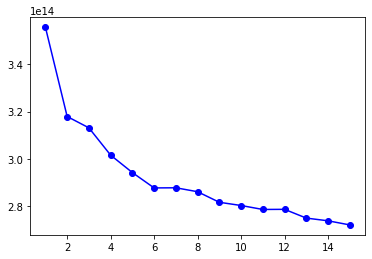

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline


kvals = range(1,16)
plt.plot(kvals,rss_list,'bo-')